In [18]:
#Third Year Paper Code
#Rational Expectation
import numpy as np
import random 
import matplotlib.pyplot as plt

In [2]:
# Simulation Setting
# Based on DO (1999) lab setting
# with u = 100
# start with production good in storage
# constant gain learning with gamma = 0.7

In [3]:
#Basic Parameters
u = 100
β = 0.9
c_1 = 1
c_2 = 4
c_3 = 9
t = 1
γ = 0.5

In [4]:
#initial value for Q
#When initial condition is production good in storage
#based on rational expectation
shock = 0
Q_12 = 65 + shock
Q_13 = 103 + shock
Q_11 = Q_12 + u
Q_21 = 256 + shock
Q_23 = 244 + shock
Q_22 = Q_23 + u
Q_31 = 290 + shock
Q_32 = 230 + shock
Q_33 = Q_31 + u



In [5]:
# Create agents
# Agents have there type which same as there consumption type, they also have production type
class Agent:
    agentCount = 0

    def __init__(self, id, consume_type, product_type):
        self.id = id
        self.consume_type = consume_type
        self.product_type = product_type
        self.storage_type = product_type
        self.opposite_storage = 0
        self.trading_result = False
        self.trading = False
        self.original_storage = self.storage_type

        #generate type 1 agents'E(V) (Rational Expectation value for good 1,2,3)
        if self.consume_type == 1:
            self.EV_2 = 65 
        if self.consume_type == 1:
            self.EV_3 = 103 
        if self.consume_type == 1:
            self.EV_1 = 9999
            
        #generate type 1 agents'E(V) (Rational Expectation value for good 1,2,3)
        if self.consume_type == 2:
            self.EV_1 = 256 
        if self.consume_type == 2:
            self.EV_3 = 244
        if self.consume_type == 2:
            self.EV_2 = 9999
            
        #generate type 3 agents' Q(precieved value for holding good 1 , 2 , 3)
        if self.consume_type == 3:
            self.EV_1 = 290 
        if self.consume_type == 3:
            self.EV_2 = 230 
        if self.consume_type == 3:
            self.EV_3 = 9999

        # other characteristics wait to be added
        Agent.agentCount += 1

    def displayAgent(self):
        print("Agent id:", self.id, "consume:", self.consume_type, ",produce:", self.product_type, ",storage:",
              self.storage_type, "EV_1:", self.EV_1, "EV_2:", self.EV_2, "EV_3:", self.EV_3,"opposite:",self.opposite_storage,"trading:",self.trading,"trading_reuslt:",self.trading_result)

        


In [6]:
# matching process
# update agent's information of what situation he is facing
def match(mylist):
    random.shuffle(mylist)
    matchlist = dict()
    index = list(range(0, len(mylist), 2))
    for i in index:
        matchlist[mylist[i]] = mylist[i + 1]
    for key in matchlist:
        update_opposite_storage(key,matchlist[key]) 
        key.original_storage = key.storage_type #easy to update Q at the end of the round
        matchlist[key].original_storage = matchlist[key].storage_type
    return matchlist

# update what good the other agent is holding
def update_opposite_storage(agent1, agent2):
    storage_1 = agent1.storage_type
    storage_2 = agent2.storage_type
    agent1.opposite_storage = storage_2
    agent2.opposite_storage = storage_1

In [7]:
#get the parameters for decision making and updating Q
def get_EV_hold(agent):
    if agent.storage_type == 1:
        return agent.EV_1
    elif agent.storage_type == 2:
        return agent.EV_2
    elif agent.storage_type == 3:
        return agent.EV_3

def get_original_EV_hold(agent):
    if agent.original_storage == 1:
        return agent.EV_1
    elif agent.original_storage == 2:
        return agent.EV_2
    elif agent.original_storage == 3:
        return agent.EV_3

def set_EV_hold(agent,update_value):
    if agent.storage_type == 1:
        agent.EV_1 = update_value
    elif agent.storage_type == 2:
        agent.EV_2 = update_value
    elif agent.storage_type == 3:
        agent.EV_3 = update_value
        
def set_original_EV_hold(agent,update_value):
    if agent.original_storage == 1:
        agent.EV_1 = update_value
    elif agent.original_storage == 2:
        agent.EV_2 = update_value
    elif agent.original_storage == 3:
        agent.EV_3 = update_value

def get_EV_trade(agent):
    if agent.opposite_storage == 1:
        return agent.EV_1
    elif agent.opposite_storage == 2:
        return agent.EV_2
    elif agent.opposite_storage == 3:
        return agent.EV_3

def get_C_hold(agent):
    if agent.storage_type == 1:
        return c_1
    elif agent.storage_type == 2:
        return c_2
    elif agent.storage_type == 3:
        return c_3

def get_C_trade(agent):
    if agent.opposite_storage == 1:
        return c_1
    elif agent.opposite_storage == 2:
        return c_2
    elif agent.opposite_storage == 3:
        return c_3


In [8]:
#get the proportion for each type of agents
def count_a1_s2(mylist): #agent 1 holding good 2
    result = 0
    a_1_2 = 0
    for ele in mylist:
        if (ele.consume_type == 1 and ele.storage_type == 2):
            a_1_2 += 1
    result = a_1_2
    return result

def count_a1_s3(mylist): #agent 1 holding good 3
    result = 0
    a_1_3 = 0
    for ele in mylist:
        if (ele.consume_type == 1 and ele.storage_type == 3):
            a_1_3 += 1
    result = a_1_3
    return result

def count_a2_s1(mylist): #agent 2 holding good 1
    result = 0
    a_2_1 = 0
    for ele in mylist:
        if (ele.consume_type == 2 and ele.storage_type == 1):
            a_2_1 += 1
    result = a_2_1
    return result

def count_a2_s3(mylist): #agent 2 holding good 3
    result = 0
    a_2_3 = 0
    for ele in mylist:
        if (ele.consume_type == 2 and ele.storage_type == 3):
            a_2_3 += 1
    result = a_2_3
    return result

def count_a3_s1(mylist): #agent 3 holding good 1
    result = 0
    a_3_1 = 0
    for ele in mylist:
        if (ele.consume_type == 3 and ele.storage_type == 1):
            a_3_1 += 1
    result = a_3_1
    return result

def count_a3_s2(mylist): #agent 3 holding good 2
    result = 0
    a_3_2 = 0
    for ele in mylist:
        if (ele.consume_type == 1 and ele.storage_type == 2):
            a_3_2 += 1
    result = a_3_2
    return result



def get_p21(mylist):
    p21 = 0
    p21 = count_a2_s1(mylist) / 24
    return p21

def get_p31(mylist):
    p31 = 0
    p31 = count_a2_s3(mylist) / 24
    return p31

In [9]:
# Rational Expectation Value
#EV_12 = (P12 + P13 + P21 + P31 + P32) * V12 + P23 * V13 + P21 * u


In [10]:
# trading decision by each agent


def transaction_decision(agent):
    EV_hold = get_EV_hold(agent)
    EV_trade = get_EV_trade(agent)
    C_hold = get_C_hold(agent)
    C_trade = get_C_trade(agent)

    if β * EV_hold - C_hold < β * EV_trade - C_trade:
        agent.trading = True
    else:
        agent.trading = False
        
def simple_RE_transaction_decision(agent):
    if (agent.consume_type == 1 and agent.storage_type == 2 and agent.opposite_storage == 3):
        if (c_3 - c_2) < (p31 - p21) * β * u:
            agent.trading = True
        else:
            agent.trading = False
    elif (agent.consume_type == 1 and agent.storage_type == 3 and agent.opposite_storage == 2):
        if (c_2 - c_3) < (p21 - p31) * β * u:
            agent.trading = True
        else:
            agent.trading = False
    elif (agent.consume_type == 1 and agent.opposite_storage == 1):
        agent.trading = True 
    elif (agent.consume_type == 2 and agent.storage_type == 3 and agent.opposite_storage == 1):
        agent.trading = True
    elif (agent.consume_type == 2 and agent.opposite_storage == 2):
        agent.trading = True
    elif (agent.consume_type == 3 and agent.storage_type == 2 and agent.opposite_storage == 1):
        agent.trading = True
    elif (agent.consume_type == 3 and agent.opposite_storage == 3):
        agent.trading = True
    else:
        agent.trading = False
        
        
        
# trading results 
def produce_outcome(matched_list):
    trade_outcome = list()
    for key in matched_list.keys():
        if key.trading == True and matched_list[key].trading == True:
            trade_outcome.append(True)
            key.trading_result = True
            matched_list[key].trading_result = True
        else:
            trade_outcome.append(False)
            key.trading_result = False
            matched_list[key].trading_result = False
    return trade_outcome



In [11]:
# based on trading result, updates EV and storage

def update_trading(agent):
    if(agent.trading_result == False): #if there is no trade
        v_prime = get_C_hold(agent)*(-1) + β * get_EV_hold(agent)
        updated_value = get_EV_hold(agent) + γ * (v_prime - get_EV_hold(agent))
        set_EV_hold(agent,updated_value)
    else: #if trade happened 
        if agent.consume_type == agent.opposite_storage: #agent gets his own consumption good
            agent.storage_type = agent.product_type #agent eats the consumption good and produces another production good 
            v_prime = get_C_hold(agent) * (-1) + β * get_EV_hold(agent) + u
            updated_value = get_original_EV_hold(agent) + γ * (v_prime - get_original_EV_hold(agent))
            set_original_EV_hold(agent,updated_value)
        else: #agent does not get his cons good
            agent.storage_type = agent.opposite_storage 
            v_prime = get_C_hold(agent) *(-1) + β * get_EV_hold(agent)
            updated_value = get_original_EV_hold(agent) + γ * (v_prime - get_original_EV_hold(agent))
            set_original_EV_hold(agent, updated_value)
            
def simple_RE_update_trading(agent):
    if (agent.trading_result == True):
        if agent.consume_type == agent.opposite_storage:
            agent.storage_type = agent.product_type
        else:
            agent.storage_type = agent.opposite_storage 

In [12]:
# Global behavior recorder

def global_a1_s2_f3(mylist,count_down,count_up): #agent 1 holding 2 facing opportunity for 3
    result = list()
    for ele in mylist:
        if (ele.consume_type == 1 and ele.storage_type == 2 and ele.opposite_storage == 3):
            count_down += 1
            if (ele.trading == True):
                count_up += 1

    result.append(count_up)
    result.append(count_down)
    return result

def global_a2_s3_f1(mylist,count_down,count_up): #agent 2 holding 3 facing opportunity for 1
    result = list()
    for ele in mylist:
        if (ele.consume_type == 2 and ele.storage_type == 3 and ele.opposite_storage == 1):
            count_down += 1
            if (ele.trading == True):
                count_up += 1

    result.append(count_up)
    result.append(count_down)
    return result

def global_a3_s1_f2(mylist,count_down,count_up): #agent 3 holding 1 facing opportunity for 2
    result = list()
    for ele in mylist:
        if (ele.consume_type == 3 and ele.storage_type == 1 and ele.opposite_storage == 2):
            count_down += 1
            if (ele.trading == True):
                count_up += 1

    result.append(count_up)
    result.append(count_down)
    return result

def global_a1_s_f1(mylist,count_down,count_up): #agent 1 holding ANY good facing opportunity for 1
    result = list()
    for ele in mylist:
        if (ele.consume_type == 1  and ele.opposite_storage == 1):
            count_down += 1
            if (ele.trading == True):
                count_up += 1

    result.append(count_up)
    result.append(count_down)
    return result

def global_a2_s_f2(mylist,count_down,count_up): #agent 2 holding ANY good facing opportunity for 2
    result = list()
    for ele in mylist:
        if (ele.consume_type == 2  and ele.opposite_storage ==2 ):
            count_down += 1
            if (ele.trading == True):
                count_up += 1

    result.append(count_up)
    result.append(count_down)
    return result

def global_a3_s_f3(mylist,count_down,count_up): #agent 3 holding ANY good facing opportunity for 3
    result = list()
    for ele in mylist:
        if (ele.consume_type == 3  and ele.opposite_storage ==3 ):
            count_down += 1
            if (ele.trading == True):
                count_up += 1

    result.append(count_up)
    result.append(count_down)
    return result

In [34]:
# main code

if __name__ == '__main__':
    u = 100
    β = 0.9
    c_1 = 1
    c_2 = 4
    c_3 = 9
    t = 1

    mylist = list()
    agent1 = Agent(1, 1, 2)
    mylist.append(agent1)
    agent2 = Agent(2, 1, 2)
    mylist.append(agent2)
    agent3 = Agent(3, 1, 2)
    mylist.append(agent3)
    agent4 = Agent(4, 1, 2)
    mylist.append(agent4)
    agent5 = Agent(5, 1, 2)
    mylist.append(agent5)
    agent6 = Agent(6, 1, 2)
    mylist.append(agent6)
    agent7 = Agent(7, 1, 2)
    mylist.append(agent7)
    agent8 = Agent(8, 1, 2)
    mylist.append(agent8)
    agent9 = Agent(9, 2, 3)
    mylist.append(agent9)
    agent10 = Agent(10, 2, 3)
    mylist.append(agent10)
    agent11 = Agent(11, 2, 3)
    mylist.append(agent11)
    agent12 = Agent(12, 2, 3)
    mylist.append(agent12)
    agent13 = Agent(13, 2, 3)
    mylist.append(agent13)
    agent14 = Agent(14, 2, 3)
    mylist.append(agent14)
    agent15 = Agent(15, 2, 3)
    mylist.append(agent15)
    agent16 = Agent(16, 2, 3)
    mylist.append(agent16)
    agent17 = Agent(17, 3, 1)
    mylist.append(agent17)
    agent18 = Agent(18, 3, 1)
    mylist.append(agent18)
    agent19 = Agent(19, 3, 1)
    mylist.append(agent19)
    agent20 = Agent(20, 3, 1)
    mylist.append(agent20)
    agent21 = Agent(21, 3, 1)
    mylist.append(agent21)
    agent22 = Agent(22, 3, 1)
    mylist.append(agent22)
    agent23 = Agent(23, 3, 1)
    mylist.append(agent23)
    agent24 = Agent(24, 3, 1)
    mylist.append(agent24)
    

    game_continue = True
    
    p21 = get_p21(mylist)
    p31 = get_p31(mylist)

    count_round = 0
    sum_up123 = 0
    sum_down123 = 0
    sum_up231 = 0
    sum_down231 = 0
    sum_up312 = 0
    sum_down312 = 0
    
    result_list_123_each_round = []
    
    
    sum_up11 = 0
    sum_down11 = 0
    sum_up22 = 0
    sum_down22 = 0
    sum_up33 = 0
    sum_down33 = 0
    
    p_12_list = list()
    p_23_list = list()
    p_31_list = list()
    
    while(count_round < 140):
        count_round += 1
        matched_list = match(mylist)

        for key in matched_list.keys():
            simple_RE_transaction_decision(key)
            simple_RE_transaction_decision(matched_list[key])

        global_r1_2_3 = global_a1_s2_f3(mylist,0,0)
        sum_up123 = sum_up123 + global_r1_2_3[0]
        sum_down123 = sum_down123 + global_r1_2_3[1]
        result_list_123_each_round.append( (global_r1_2_3[0]+0.1) / (global_r1_2_3[1]+0.1) )
        
        global_r2_3_1 = global_a2_s3_f1(mylist,0,0)
        sum_up231 = sum_up231 + global_r2_3_1[0]
        sum_down231 = sum_down231 + global_r2_3_1[1]
        
        global_r3_1_2 = global_a3_s1_f2(mylist,0,0)
        sum_up312 = sum_up312 + global_r3_1_2[0]
        sum_down312 = sum_down312 + global_r3_1_2[1]
        
        global_r1_1 = global_a1_s_f1(mylist,0,0)
        sum_up11 = sum_up11 + global_r1_1[0]
        sum_down11 = sum_down11 + global_r1_1[1]
        
        global_r2_2 = global_a2_s_f2(mylist,0,0)
        sum_up22 = sum_up22 + global_r2_2[0]
        sum_down22 = sum_down22 + global_r2_2[1]
        
        global_r3_3 = global_a3_s_f3(mylist,0,0)
        sum_up33 = sum_up33 + global_r3_3[0]
        sum_down33 = sum_down33 + global_r3_3[1]

        for ele in mylist:
            ele.displayAgent()

        produce_outcome(matched_list)

        for key in matched_list.keys():
            simple_RE_update_trading(key)
            simple_RE_update_trading(matched_list[key])
        
        agent1_s2 = 0
        agent2_s3 = 0
        agent3_s1 = 0
        for i in mylist:
            if i.consume_type == 1:
                if i.storage_type == 2:
                    agent1_s2 = agent1_s2 + 1
            if i.consume_type == 2:
                if i.storage_type == 3:
                    agent2_s3 = agent2_s3 + 1
            if i.consume_type == 3:
                if i.storage_type == 1:
                    agent3_s1 = agent3_s1 + 1

        p_p12 = agent1_s2 / 8
        p_p23 = agent2_s3 / 8
        p_p31 = agent3_s1 / 8  
        
        p_12_list.append(p_p12)
        p_23_list.append(p_p23)
        p_31_list.append(p_p31)
        

        print(count_round)

        stopping_draw = random.uniform(0, 1)
        if stopping_draw > 0.01:
            game_continue = True
        else:
            game_continue = False

    print("Agent 1 with good 2 facing good 3:", sum_up123/sum_down123)
    print("Agent 2 with good 3 facing good 1:", sum_up231/sum_down231)
    print("Agent 3 with good 1 facing good 2:", sum_up312/sum_down312)
    
    print("Agent 1 facing good 1:", sum_up11/sum_down11)
    print("Agent 2 facing good 2:", sum_up22/sum_down22)
    print("Agent 3 facing good 3:", sum_up33/sum_down33)
    

Agent id: 10 consume: 2 ,produce: 3 ,storage: 3 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 2 trading: True trading_reuslt: False
Agent id: 2 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 3 trading: True trading_reuslt: False
Agent id: 20 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 23 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 22 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 19 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 9 consume: 2 ,produce: 3 ,storage: 3 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 1 trading: True trading_reuslt: False
Agent id: 17 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 3 trading: True tradi

Agent id: 4 consume: 1 ,produce: 2 ,storage: 3 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 2 trading: False trading_reuslt: False
Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 3 trading: True trading_reuslt: False
4
Agent id: 12 consume: 2 ,produce: 3 ,storage: 1 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 1 trading: False trading_reuslt: False
Agent id: 24 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_reuslt: False
Agent id: 16 consume: 2 ,produce: 3 ,storage: 1 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 2 trading: True trading_reuslt: False
Agent id: 21 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 8 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_

Agent id: 12 consume: 2 ,produce: 3 ,storage: 1 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 1 trading: False trading_reuslt: False
Agent id: 19 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 3 consume: 1 ,produce: 2 ,storage: 3 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_reuslt: False
Agent id: 2 consume: 1 ,produce: 2 ,storage: 3 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_reuslt: True
Agent id: 16 consume: 2 ,produce: 3 ,storage: 1 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 3 trading: False trading_reuslt: True
Agent id: 13 consume: 2 ,produce: 3 ,storage: 3 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 2 trading: True trading_reuslt: True
Agent id: 5 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 3 trading: True trading_reuslt: True
Agent id: 22 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 1 trading: False trading_reusl

Agent id: 6 consume: 1 ,produce: 2 ,storage: 3 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_reuslt: False
Agent id: 17 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 20 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 7 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_reuslt: False
Agent id: 19 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 1 trading: False trading_reuslt: True
Agent id: 23 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 11 consume: 2 ,produce: 3 ,storage: 3 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 3 trading: False trading_reuslt: False
Agent id: 10 consume: 2 ,produce: 3 ,storage: 3 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 3 trading: False tradin

Agent id: 11 consume: 2 ,produce: 3 ,storage: 3 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 1 trading: True trading_reuslt: True
Agent id: 6 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 2 trading: False trading_reuslt: False
Agent id: 7 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 2 trading: False trading_reuslt: False
Agent id: 3 consume: 1 ,produce: 2 ,storage: 3 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_reuslt: False
Agent id: 18 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 17 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 2 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_reuslt: False
Agent id: 22 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 3 trading: True trading_reus

Agent id: 14 consume: 2 ,produce: 3 ,storage: 1 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 3 trading: False trading_reuslt: True
Agent id: 11 consume: 2 ,produce: 3 ,storage: 3 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 1 trading: True trading_reuslt: True
Agent id: 24 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 15 consume: 2 ,produce: 3 ,storage: 3 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 1 trading: True trading_reuslt: True
Agent id: 16 consume: 2 ,produce: 3 ,storage: 3 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 1 trading: True trading_reuslt: True
Agent id: 21 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 18 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 5 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_re

Agent id: 20 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 8 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_reuslt: True
Agent id: 24 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 3 trading: True trading_reuslt: True
Agent id: 4 consume: 1 ,produce: 2 ,storage: 3 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_reuslt: False
Agent id: 1 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_reuslt: True
Agent id: 13 consume: 2 ,produce: 3 ,storage: 1 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 2 trading: True trading_reuslt: True
Agent id: 5 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_reuslt: False
Agent id: 18 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 2 trading: False trading_reuslt: 

Agent id: 24 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 2 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_reuslt: True
Agent id: 6 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_reuslt: False
Agent id: 9 consume: 2 ,produce: 3 ,storage: 1 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 2 trading: True trading_reuslt: False
Agent id: 17 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 1 trading: False trading_reuslt: True
Agent id: 21 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 13 consume: 2 ,produce: 3 ,storage: 1 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 1 trading: False trading_reuslt: False
Agent id: 14 consume: 2 ,produce: 3 ,storage: 1 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 1 trading: False trading_

Agent id: 9 consume: 2 ,produce: 3 ,storage: 1 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 1 trading: False trading_reuslt: True
Agent id: 14 consume: 2 ,produce: 3 ,storage: 3 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 2 trading: True trading_reuslt: True
Agent id: 5 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 3 trading: True trading_reuslt: True
Agent id: 1 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 3 trading: True trading_reuslt: False
Agent id: 3 consume: 1 ,produce: 2 ,storage: 3 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 2 trading: False trading_reuslt: False
27
Agent id: 8 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_reuslt: True
Agent id: 17 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 4 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_reuslt:

Agent id: 7 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_reuslt: True
Agent id: 4 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 3 trading: True trading_reuslt: True
Agent id: 2 consume: 1 ,produce: 2 ,storage: 3 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 2 trading: False trading_reuslt: True
Agent id: 14 consume: 2 ,produce: 3 ,storage: 3 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 1 trading: True trading_reuslt: False
Agent id: 19 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 1 consume: 1 ,produce: 2 ,storage: 3 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_reuslt: False
Agent id: 21 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 3 trading: True trading_reuslt: True
Agent id: 13 consume: 2 ,produce: 3 ,storage: 1 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 1 trading: False trading_reuslt: 

Agent id: 6 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_reuslt: False
Agent id: 17 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 2 trading: False trading_reuslt: True
Agent id: 15 consume: 2 ,produce: 3 ,storage: 3 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 1 trading: True trading_reuslt: False
Agent id: 22 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 3 trading: True trading_reuslt: True
Agent id: 8 consume: 1 ,produce: 2 ,storage: 3 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 2 trading: False trading_reuslt: False
Agent id: 7 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 3 trading: True trading_reuslt: False
Agent id: 11 consume: 2 ,produce: 3 ,storage: 3 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 1 trading: True trading_reuslt: True
Agent id: 23 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 3 trading: True trading_reusl

Agent id: 13 consume: 2 ,produce: 3 ,storage: 1 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 2 trading: True trading_reuslt: True
Agent id: 2 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_reuslt: False
Agent id: 23 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 1 trading: False trading_reuslt: True
Agent id: 21 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 4 consume: 1 ,produce: 2 ,storage: 3 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 3 trading: False trading_reuslt: False
Agent id: 9 consume: 2 ,produce: 3 ,storage: 3 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 3 trading: False trading_reuslt: True
Agent id: 20 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 2 trading: False trading_reuslt: True
Agent id: 1 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_reus

Agent id: 18 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 1 consume: 1 ,produce: 2 ,storage: 3 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_reuslt: True
Agent id: 11 consume: 2 ,produce: 3 ,storage: 1 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 3 trading: False trading_reuslt: False
Agent id: 21 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 24 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 7 consume: 1 ,produce: 2 ,storage: 3 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_reuslt: False
Agent id: 15 consume: 2 ,produce: 3 ,storage: 1 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 3 trading: False trading_reuslt: False
Agent id: 3 consume: 1 ,produce: 2 ,storage: 3 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 2 trading: False trading

Agent id: 1 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_reuslt: False
Agent id: 17 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 6 consume: 1 ,produce: 2 ,storage: 3 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_reuslt: False
Agent id: 23 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 14 consume: 2 ,produce: 3 ,storage: 1 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 1 trading: False trading_reuslt: False
Agent id: 20 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 22 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 12 consume: 2 ,produce: 3 ,storage: 3 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 1 trading: True trading

Agent id: 17 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 16 consume: 2 ,produce: 3 ,storage: 1 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 2 trading: True trading_reuslt: True
Agent id: 8 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_reuslt: True
Agent id: 7 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 2 trading: False trading_reuslt: False
Agent id: 6 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 2 trading: False trading_reuslt: False
Agent id: 5 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_reuslt: True
Agent id: 19 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 2 trading: False trading_reuslt: True
Agent id: 11 consume: 2 ,produce: 3 ,storage: 1 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 3 trading: False trading_reuslt

Agent id: 19 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 23 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 1 trading: False trading_reuslt: False
50
Agent id: 8 consume: 1 ,produce: 2 ,storage: 3 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_reuslt: False
Agent id: 23 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 17 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 9 consume: 2 ,produce: 3 ,storage: 3 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 1 trading: True trading_reuslt: True
Agent id: 16 consume: 2 ,produce: 3 ,storage: 1 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 1 trading: False trading_reuslt: False
Agent id: 24 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 1 trading: False tra

Agent id: 20 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 2 trading: False trading_reuslt: True
Agent id: 1 consume: 1 ,produce: 2 ,storage: 3 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_reuslt: False
Agent id: 24 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 3 trading: True trading_reuslt: True
Agent id: 14 consume: 2 ,produce: 3 ,storage: 3 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 3 trading: False trading_reuslt: True
Agent id: 12 consume: 2 ,produce: 3 ,storage: 3 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 3 trading: False trading_reuslt: True
Agent id: 4 consume: 1 ,produce: 2 ,storage: 3 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 2 trading: False trading_reuslt: False
Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 3 trading: True trading_reuslt: True
Agent id: 9 consume: 2 ,produce: 3 ,storage: 1 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 1 trading: False trading_reusl

Agent id: 19 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 16 consume: 2 ,produce: 3 ,storage: 1 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 1 trading: False trading_reuslt: True
57
Agent id: 16 consume: 2 ,produce: 3 ,storage: 1 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 1 trading: False trading_reuslt: False
Agent id: 17 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 22 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 7 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_reuslt: True
Agent id: 4 consume: 1 ,produce: 2 ,storage: 3 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_reuslt: True
Agent id: 11 consume: 2 ,produce: 3 ,storage: 1 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 3 trading: False trad

Agent id: 18 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 17 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 1 trading: False trading_reuslt: True
Agent id: 19 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 1 trading: False trading_reuslt: True
Agent id: 14 consume: 2 ,produce: 3 ,storage: 3 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 3 trading: False trading_reuslt: False
Agent id: 1 consume: 1 ,produce: 2 ,storage: 3 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 3 trading: False trading_reuslt: False
Agent id: 16 consume: 2 ,produce: 3 ,storage: 3 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 2 trading: True trading_reuslt: True
Agent id: 5 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 3 trading: True trading_reuslt: False
Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 3 trading: True trading_re

Agent id: 8 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_reuslt: False
Agent id: 21 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 2 consume: 1 ,produce: 2 ,storage: 3 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_reuslt: True
Agent id: 22 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 12 consume: 2 ,produce: 3 ,storage: 3 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 1 trading: True trading_reuslt: False
Agent id: 24 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 18 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 1 trading: False trading_reuslt: True
Agent id: 9 consume: 2 ,produce: 3 ,storage: 1 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 1 trading: False trading_re

Agent id: 22 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 14 consume: 2 ,produce: 3 ,storage: 3 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 1 trading: True trading_reuslt: True
Agent id: 11 consume: 2 ,produce: 3 ,storage: 1 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 3 trading: False trading_reuslt: False
Agent id: 7 consume: 1 ,produce: 2 ,storage: 3 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_reuslt: False
Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_reuslt: True
Agent id: 9 consume: 2 ,produce: 3 ,storage: 1 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 2 trading: True trading_reuslt: False
Agent id: 12 consume: 2 ,produce: 3 ,storage: 1 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 2 trading: True trading_reuslt: True
Agent id: 4 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_reuslt:

Agent id: 14 consume: 2 ,produce: 3 ,storage: 1 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 3 trading: False trading_reuslt: False
Agent id: 6 consume: 1 ,produce: 2 ,storage: 3 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_reuslt: True
Agent id: 20 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 21 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 7 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_reuslt: True
Agent id: 9 consume: 2 ,produce: 3 ,storage: 1 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 3 trading: False trading_reuslt: True
Agent id: 10 consume: 2 ,produce: 3 ,storage: 3 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 1 trading: True trading_reuslt: True
Agent id: 4 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 2 trading: False trading_reusl

Agent id: 15 consume: 2 ,produce: 3 ,storage: 1 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 1 trading: False trading_reuslt: False
Agent id: 5 consume: 1 ,produce: 2 ,storage: 3 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 3 trading: False trading_reuslt: False
Agent id: 8 consume: 1 ,produce: 2 ,storage: 3 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 3 trading: False trading_reuslt: False
Agent id: 22 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 6 consume: 1 ,produce: 2 ,storage: 3 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_reuslt: True
Agent id: 2 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 2 trading: False trading_reuslt: False
Agent id: 4 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 2 trading: False trading_reuslt: False
Agent id: 10 consume: 2 ,produce: 3 ,storage: 3 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 1 trading: True trading_reus

Agent id: 11 consume: 2 ,produce: 3 ,storage: 1 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 1 trading: False trading_reuslt: False
Agent id: 20 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 10 consume: 2 ,produce: 3 ,storage: 3 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 3 trading: False trading_reuslt: True
Agent id: 8 consume: 1 ,produce: 2 ,storage: 3 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 3 trading: False trading_reuslt: False
Agent id: 5 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 2 trading: False trading_reuslt: False
Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 2 trading: False trading_reuslt: False
Agent id: 15 consume: 2 ,produce: 3 ,storage: 1 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 2 trading: True trading_reuslt: False
Agent id: 7 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_r

Agent id: 2 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_reuslt: False
Agent id: 24 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 20 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 1 trading: False trading_reuslt: True
Agent id: 18 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 1 trading: False trading_reuslt: False
81
Agent id: 20 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 5 consume: 1 ,produce: 2 ,storage: 3 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_reuslt: False
Agent id: 12 consume: 2 ,produce: 3 ,storage: 1 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 2 trading: True trading_reuslt: True
Agent id: 7 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_

Agent id: 13 consume: 2 ,produce: 3 ,storage: 3 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 1 trading: True trading_reuslt: False
Agent id: 12 consume: 2 ,produce: 3 ,storage: 1 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 3 trading: False trading_reuslt: True
Agent id: 4 consume: 1 ,produce: 2 ,storage: 3 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 3 trading: False trading_reuslt: False
Agent id: 1 consume: 1 ,produce: 2 ,storage: 3 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 3 trading: False trading_reuslt: True
Agent id: 20 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 2 trading: False trading_reuslt: True
Agent id: 2 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_reuslt: False
Agent id: 8 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_reuslt: True
Agent id: 19 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 2 trading: False trading_reusl

Agent id: 16 consume: 2 ,produce: 3 ,storage: 1 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 1 trading: False trading_reuslt: False
Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 3 trading: True trading_reuslt: True
Agent id: 10 consume: 2 ,produce: 3 ,storage: 3 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 2 trading: True trading_reuslt: True
Agent id: 1 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 2 trading: False trading_reuslt: True
Agent id: 6 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 2 trading: False trading_reuslt: False
Agent id: 7 consume: 1 ,produce: 2 ,storage: 3 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_reuslt: True
Agent id: 24 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 22 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 1 trading: False trading_reuslt

Agent id: 4 consume: 1 ,produce: 2 ,storage: 3 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_reuslt: True
Agent id: 14 consume: 2 ,produce: 3 ,storage: 3 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 3 trading: False trading_reuslt: True
Agent id: 10 consume: 2 ,produce: 3 ,storage: 3 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 3 trading: False trading_reuslt: False
Agent id: 16 consume: 2 ,produce: 3 ,storage: 3 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 1 trading: True trading_reuslt: False
Agent id: 11 consume: 2 ,produce: 3 ,storage: 1 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 3 trading: False trading_reuslt: False
Agent id: 21 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 18 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 1 trading: False trading_reuslt: False
92
Agent id: 21 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 1 trading: False t

Agent id: 5 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_reuslt: True
Agent id: 7 consume: 1 ,produce: 2 ,storage: 3 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_reuslt: False
Agent id: 20 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 12 consume: 2 ,produce: 3 ,storage: 3 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 3 trading: False trading_reuslt: True
Agent id: 1 consume: 1 ,produce: 2 ,storage: 3 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 3 trading: False trading_reuslt: True
Agent id: 23 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 24 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 17 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 3 trading: True trading_reu

Agent id: 15 consume: 2 ,produce: 3 ,storage: 3 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 1 trading: True trading_reuslt: True
Agent id: 22 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 3 trading: True trading_reuslt: True
Agent id: 21 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 3 trading: True trading_reuslt: True
Agent id: 6 consume: 1 ,produce: 2 ,storage: 3 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_reuslt: False
Agent id: 12 consume: 2 ,produce: 3 ,storage: 1 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 1 trading: False trading_reuslt: False
Agent id: 18 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 7 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_reuslt: False
Agent id: 13 consume: 2 ,produce: 3 ,storage: 1 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 2 trading: True trading_reu

Agent id: 17 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 6 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_reuslt: False
Agent id: 22 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 12 consume: 2 ,produce: 3 ,storage: 1 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 1 trading: False trading_reuslt: False
Agent id: 24 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 8 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 2 trading: False trading_reuslt: False
Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 2 trading: False trading_reuslt: False
Agent id: 2 consume: 1 ,produce: 2 ,storage: 3 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_

Agent id: 8 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 2 trading: False trading_reuslt: True
Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 2 trading: False trading_reuslt: True
Agent id: 24 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 15 consume: 2 ,produce: 3 ,storage: 1 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 1 trading: False trading_reuslt: True
Agent id: 13 consume: 2 ,produce: 3 ,storage: 1 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 1 trading: False trading_reuslt: True
Agent id: 19 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 10 consume: 2 ,produce: 3 ,storage: 3 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 1 trading: True trading_reuslt: True
Agent id: 22 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 3 trading: True trading_r

Agent id: 19 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 3 trading: True trading_reuslt: False
111
Agent id: 7 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 2 trading: False trading_reuslt: False
Agent id: 8 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 2 trading: False trading_reuslt: True
Agent id: 2 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 3 trading: True trading_reuslt: False
Agent id: 10 consume: 2 ,produce: 3 ,storage: 3 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 2 trading: True trading_reuslt: True
Agent id: 13 consume: 2 ,produce: 3 ,storage: 1 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 3 trading: False trading_reuslt: False
Agent id: 6 consume: 1 ,produce: 2 ,storage: 3 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_reuslt: True
Agent id: 1 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_reus

Agent id: 24 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 12 consume: 2 ,produce: 3 ,storage: 1 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 1 trading: False trading_reuslt: False
Agent id: 7 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 3 trading: True trading_reuslt: True
Agent id: 8 consume: 1 ,produce: 2 ,storage: 3 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 2 trading: False trading_reuslt: True
Agent id: 18 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 1 trading: False trading_reuslt: True
Agent id: 19 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 1 trading: False trading_reuslt: True
Agent id: 13 consume: 2 ,produce: 3 ,storage: 3 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 1 trading: True trading_reuslt: True
Agent id: 20 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 3 trading: True trading_re

Agent id: 12 consume: 2 ,produce: 3 ,storage: 1 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 1 trading: False trading_reuslt: False
Agent id: 14 consume: 2 ,produce: 3 ,storage: 1 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 1 trading: False trading_reuslt: False
Agent id: 19 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 2 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_reuslt: False
Agent id: 9 consume: 2 ,produce: 3 ,storage: 1 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 2 trading: True trading_reuslt: False
Agent id: 10 consume: 2 ,produce: 3 ,storage: 3 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 2 trading: True trading_reuslt: True
Agent id: 5 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 3 trading: True trading_reuslt: False
Agent id: 16 consume: 2 ,produce: 3 ,storage: 3 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 1 trading: True trading_r

Agent id: 2 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_reuslt: False
Agent id: 21 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 2 trading: False trading_reuslt: True
Agent id: 5 consume: 1 ,produce: 2 ,storage: 3 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 2 trading: False trading_reuslt: False
Agent id: 6 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 3 trading: True trading_reuslt: False
Agent id: 24 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 22 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 4 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 3 trading: True trading_reuslt: False
Agent id: 10 consume: 2 ,produce: 3 ,storage: 3 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 2 trading: True trading_reu

Agent id: 10 consume: 2 ,produce: 3 ,storage: 1 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 3 trading: False trading_reuslt: False
Agent id: 23 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 5 consume: 1 ,produce: 2 ,storage: 3 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_reuslt: False
Agent id: 17 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 18 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 7 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 2 trading: False trading_reuslt: True
Agent id: 8 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 2 trading: False trading_reuslt: False
Agent id: 4 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 3 trading: True trading_re

Agent id: 10 consume: 2 ,produce: 3 ,storage: 3 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 2 trading: True trading_reuslt: False
Agent id: 5 consume: 1 ,produce: 2 ,storage: 3 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 3 trading: False trading_reuslt: False
Agent id: 12 consume: 2 ,produce: 3 ,storage: 3 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 3 trading: False trading_reuslt: True
Agent id: 18 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 13 consume: 2 ,produce: 3 ,storage: 1 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 1 trading: False trading_reuslt: True
Agent id: 16 consume: 2 ,produce: 3 ,storage: 3 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 1 trading: True trading_reuslt: False
Agent id: 19 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 15 consume: 2 ,produce: 3 ,storage: 3 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 1 trading: True tradin

Agent id: 11 consume: 2 ,produce: 3 ,storage: 1 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 1 trading: False trading_reuslt: False
Agent id: 10 consume: 2 ,produce: 3 ,storage: 1 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 1 trading: False trading_reuslt: True
Agent id: 7 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_reuslt: True
Agent id: 9 consume: 2 ,produce: 3 ,storage: 1 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 2 trading: True trading_reuslt: True
Agent id: 22 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 3 trading: True trading_reuslt: True
Agent id: 3 consume: 1 ,produce: 2 ,storage: 3 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_reuslt: False
132
Agent id: 18 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 15 consume: 2 ,produce: 3 ,storage: 3 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 1 trading: True trading_r

Agent id: 17 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 13 consume: 2 ,produce: 3 ,storage: 1 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 2 trading: True trading_reuslt: False
Agent id: 6 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_reuslt: False
Agent id: 12 consume: 2 ,produce: 3 ,storage: 3 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 2 trading: True trading_reuslt: False
Agent id: 1 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 3 trading: True trading_reuslt: False
Agent id: 11 consume: 2 ,produce: 3 ,storage: 3 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 1 trading: True trading_reuslt: True
Agent id: 24 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 16 consume: 2 ,produce: 3 ,storage: 3 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 3 trading: False trading_r

Agent id: 13 consume: 2 ,produce: 3 ,storage: 3 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 1 trading: True trading_reuslt: True
Agent id: 20 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 3 trading: True trading_reuslt: True
Agent id: 8 consume: 1 ,produce: 2 ,storage: 3 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 2 trading: False trading_reuslt: False
Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 3 trading: True trading_reuslt: True
Agent id: 22 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 15 consume: 2 ,produce: 3 ,storage: 1 EV_1: 256 EV_2: 9999 EV_3: 244 opposite: 1 trading: False trading_reuslt: False
139
Agent id: 19 consume: 3 ,produce: 1 ,storage: 1 EV_1: 290 EV_2: 230 EV_3: 9999 opposite: 2 trading: False trading_reuslt: True
Agent id: 7 consume: 1 ,produce: 2 ,storage: 2 EV_1: 9999 EV_2: 65 EV_3: 103 opposite: 1 trading: True trading_

In [35]:
# equilibrium distribution
agent1_s2 = 0
agent2_s3 = 0
agent3_s1 = 0
for i in mylist:
    if i.consume_type == 1:
        if i.storage_type == 2:
            agent1_s2 = agent1_s2 + 1
    if i.consume_type == 2:
        if i.storage_type == 3:
            agent2_s3 = agent2_s3 + 1
    if i.consume_type == 3:
        if i.storage_type == 1:
            agent3_s1 = agent3_s1 + 1

p_p12 = agent1_s2 / 8
p_p23 = agent2_s3 / 8
p_p31 = agent3_s1 / 8

print(p_p12,p_p23,p_p31)

0.5 0.25 1.0


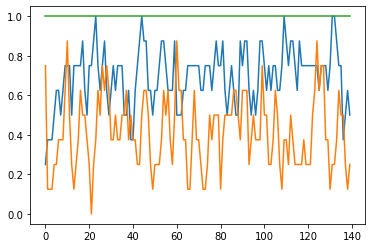

In [36]:
plt.plot(p_12_list)
plt.plot(p_23_list)
plt.plot(p_31_list)


#5


In [39]:
p_21_list = np.array()
for i in p_23_list:
    p_21_list.append(1 - p_23_list[i])
rhs_for_a1 = (p_31_list - p_21_list) * β * u


TypeError: array() missing required argument 'object' (pos 1)